<a href="https://colab.research.google.com/github/rizwannitk/machinelearning/blob/main/fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FB Prophet

In [ ]:
!pip install fbprophet

In [56]:
from fbprophet import Prophet

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [48]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [49]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [51]:
ny_df =df.set_index("timeStamp")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f15b0c18048>,
      dtype=object)

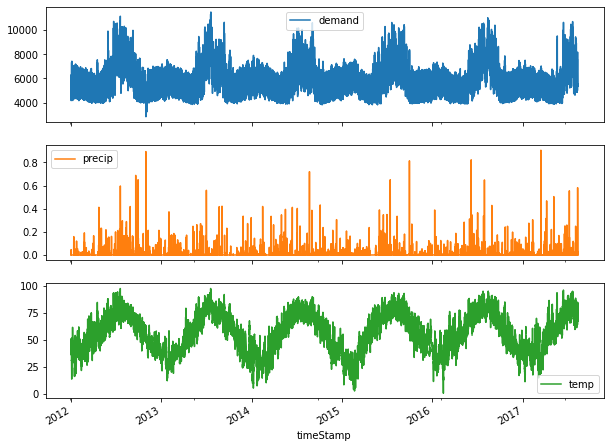

In [52]:
ny_df.plot(subplots=True)

In [53]:
ny_df_daily=ny_df.resample('D').mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f15af3742e8>,
      dtype=object)

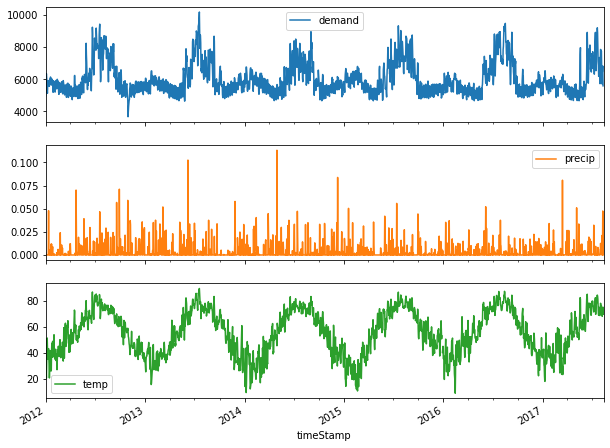

In [55]:
ny_df_daily.plot(subplots=True)

In [58]:
ny_df_final=ny_df_daily.reset_index()[["timeStamp","demand"]].rename({"timeStamp":'ds',"demand":"y"},axis="columns")

In [59]:
ny_df_final.head()

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833


In [74]:
train=ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test=ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [67]:
test.shape

(104, 2)

In [75]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)

In [77]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
m.params

{'beta': array([[-0.03474564, -0.07051982,  0.05760445,  0.04706222, -0.01404777,
         -0.00499591, -0.00387932, -0.00073284,  0.00241073, -0.00756147,
          0.00404936,  0.00483016, -0.00789882, -0.00470511,  0.00701484,
         -0.00268429, -0.00128001,  0.00170179,  0.00035188, -0.0002186 ,
         -0.02824661,  0.02385118,  0.0206227 ,  0.00054777, -0.00494972,
         -0.00501049]]),
 'delta': array([[-3.50360674e-09, -1.32489168e-02, -7.74174578e-02,
          2.56670913e-08,  8.81258464e-08, -1.46805043e-08,
          1.70635442e-08, -2.64450633e-08, -5.82121639e-08,
          5.89599724e-08, -5.16647027e-02, -5.73312969e-02,
         -5.10303343e-05,  3.64173165e-08,  2.05843529e-01,
          5.29272199e-02, -1.73045352e-07, -8.36841050e-02,
         -7.56589140e-02,  3.12992747e-08, -2.32275699e-08,
          1.07689546e-08,  2.03120136e-02,  2.96291061e-03,
          2.74957150e-08]]),
 'k': array([[0.08260908]]),
 'm': array([[0.5937986]]),
 'sigma_obs': array([[

In [78]:
future=m.make_future_dataframe(periods=104)

In [71]:
future.head()

,ds
0,2012-01-01
1,2012-01-02
2,2012-01-03
3,2012-01-04
4,2012-01-05


In [72]:
forecast=m.predict(future)

In [79]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,6034.940960,4203.709276,5995.995872,6034.940960,6034.940960,-929.934617,-929.934617,-929.934617,-541.068072,-541.068072,-541.068072,-388.866544,-388.866544,-388.866544,0.0,0.0,0.0,5105.006343
1,2012-01-02,6035.372399,4911.635494,6767.357348,6035.372399,6035.372399,-245.909743,-245.909743,-245.909743,133.872072,133.872072,133.872072,-379.781815,-379.781815,-379.781815,0.0,0.0,0.0,5789.462656
2,2012-01-03,6035.803837,4991.917806,6811.804394,6035.803837,6035.803837,-129.225376,-129.225376,-129.225376,240.783556,240.783556,240.783556,-370.008933,-370.008933,-370.008933,0.0,0.0,0.0,5906.578461
3,2012-01-04,6036.235275,4972.204502,6812.849807,6036.235275,6036.235275,-121.910180,-121.910180,-121.910180,237.713222,237.713222,237.713222,-359.623402,-359.623402,-359.623402,0.0,0.0,0.0,5914.325096
4,2012-01-05,6036.666714,5008.066439,6833.883530,6036.666714,6036.666714,-151.658496,-151.658496,-151.658496,197.050426,197.050426,197.050426,-348.708921,-348.708921,-348.708921,0.0,0.0,0.0,5885.008218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2017-08-08,6090.176660,6654.204982,8444.066601,6061.124525,6119.012665,1502.790656,1502.790656,1502.790656,240.783556,240.783556,240.783556,1262.007099,1262.007099,1262.007099,0.0,0.0,0.0,7592.967315
2047,2017-08-09,6090.205898,6615.426568,8553.705287,6060.880849,6119.514894,1491.920917,1491.920917,1491.920917,237.713222,237.713222,237.713222,1254.207695,1254.207695,1254.207695,0.0,0.0,0.0,7582.126815
2048,2017-08-10,6090.235136,6647.023784,8454.488496,6060.482379,6120.001778,1446.655912,1446.655912,1446.655912,197.050426,197.050426,197.050426,1249.605487,1249.605487,1249.605487,0.0,0.0,0.0,7536.891048
2049,2017-08-11,6090.264374,6588.651392,8435.974641,6060.025927,6120.487788,1401.891046,1401.891046,1401.891046,153.844819,153.844819,153.844819,1248.046226,1248.046226,1248.046226,0.0,0.0,0.0,7492.155420


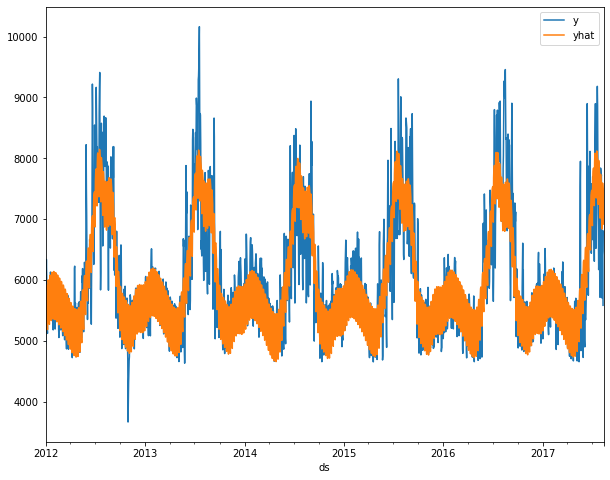

In [80]:
pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

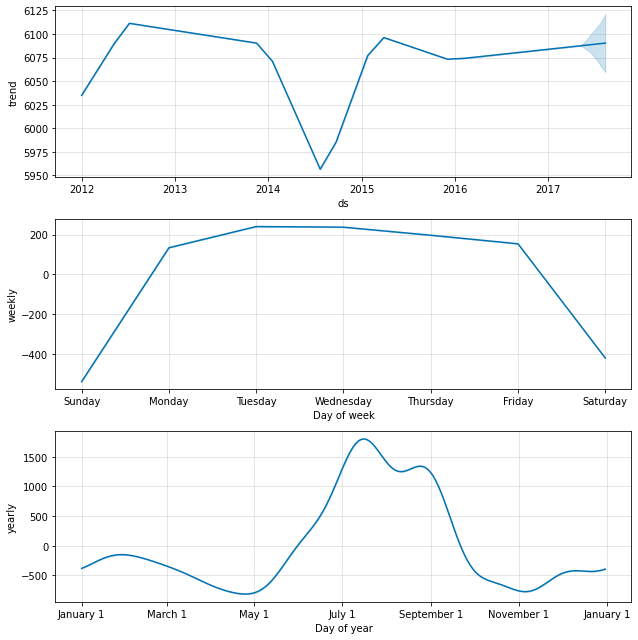

In [81]:
fig2 = m.plot_components(forecast)

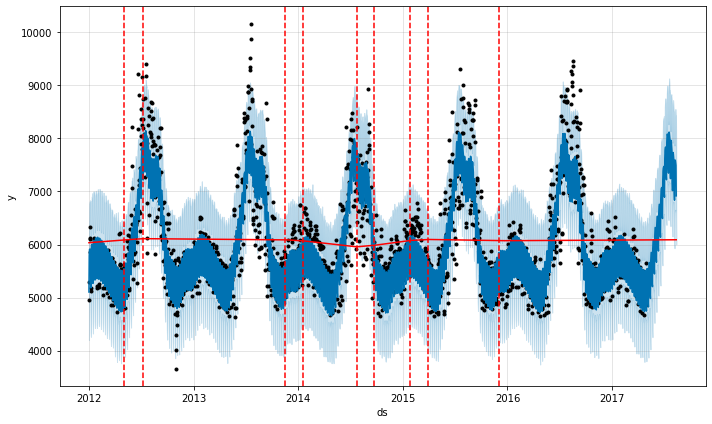

In [83]:

from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)